In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry']]
blocks_gdf.head()

,geometry
id,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6..."
1,"POLYGON ((355412.142 6623378.149, 355411.700 6..."
2,"POLYGON ((353934.329 6625429.433, 353923.453 6..."
3,"POLYGON ((355099.099 6623847.765, 355074.808 6..."
4,"POLYGON ((352766.168 6621954.748, 352744.412 6..."


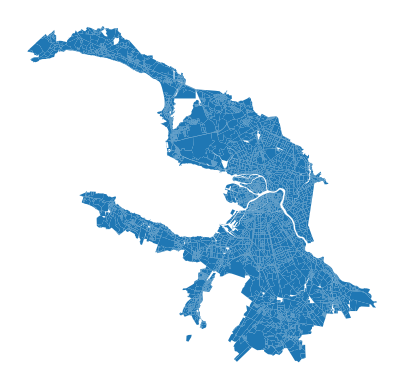

In [2]:
blocks_gdf.plot().set_axis_off()

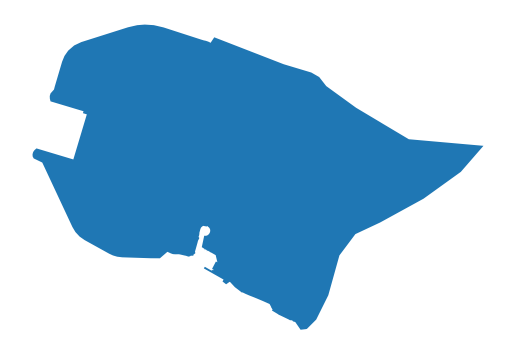

In [3]:
import osmnx as ox

context_gdf = ox.features_from_place('Россия, г. Санкт-Петербург', {'name' : 'Василеостровский район'})
context_gdf.plot().set_axis_off()

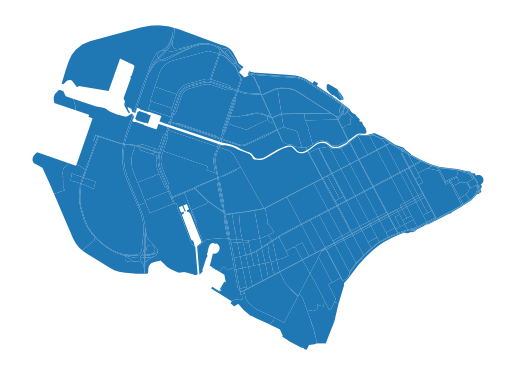

In [4]:
blocks_gdf = blocks_gdf.sjoin(context_gdf.to_crs(blocks_gdf.crs), predicate='intersects')[['geometry']]
blocks_gdf.plot().set_axis_off()

## Intermodal graph

In [20]:
from blocksnet.relations.accessibility import get_graph

graph = get_graph(blocks_gdf, 'drive')

2025-02-22 16:30:00.158 | INFO     | blocksnet.relations.accessibility.graph:get_graph:11 - CRS do not match IDUEDU required crs. Reprojecting.
2025-02-22 16:30:00.215 | INFO     | iduedu.modules.drive_walk_builder:get_drive_graph_by_poly:91 - Downloading drive graph from OSM, it may take a while for large territory ...


## Accessibility matrix

In [21]:
from blocksnet.relations.accessibility import calculate_accessibility_matrix

calculate_accessibility_matrix(blocks_gdf, graph)

id,112,113,114,115,215,216,217,218,522,523,...,13149,13150,13162,13168,13287,13301,13302,15895,16180,16181
id,,,,,,,,,,,,,,,,,,,,,
112,0.000000,2.539062,0.919922,2.460938,0.919922,1.950195,1.469727,1.830078,5.500000,6.628906,...,4.609375,4.960938,5.320312,4.000000,3.390625,4.359375,4.191406,6.640625,0.919922,0.919922
113,2.580078,0.000000,3.500000,0.879883,3.500000,3.109375,2.779297,3.140625,6.468750,7.601562,...,3.539062,3.890625,4.691406,2.929688,2.320312,2.570312,3.119141,6.039062,3.500000,3.500000
114,0.919922,3.460938,0.000000,3.380859,0.000000,2.140625,1.440430,1.940430,6.109375,7.238281,...,5.531250,5.878906,6.238281,4.921875,4.308594,5.281250,5.109375,7.558594,0.000000,0.000000
115,1.940430,0.859863,2.859375,0.000000,2.859375,2.470703,2.140625,2.500000,6.000000,7.128906,...,3.730469,4.078125,4.878906,3.119141,2.509766,3.429688,3.310547,6.230469,2.859375,2.859375
215,0.919922,3.460938,0.000000,3.380859,0.000000,2.140625,1.440430,1.940430,6.109375,7.238281,...,5.531250,5.878906,6.238281,4.921875,4.308594,5.281250,5.109375,7.558594,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13301,4.359375,2.570312,5.281250,3.410156,5.281250,3.880859,4.398438,4.699219,4.898438,6.031250,...,1.280273,1.629883,2.429688,1.190430,1.379883,0.000000,0.950195,3.779297,5.281250,5.281250
13302,4.230469,3.140625,5.148438,3.330078,5.148438,3.699219,4.218750,4.519531,3.960938,5.089844,...,0.419922,0.770020,1.570312,0.239990,0.830078,1.009766,0.000000,2.919922,5.148438,5.148438
15895,5.019531,5.339844,5.941406,5.531250,5.941406,4.058594,4.578125,4.878906,2.330078,3.460938,...,2.500000,2.810547,1.570312,2.439453,3.029297,3.630859,2.660156,0.000000,5.941406,5.941406
